In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('../datas/train_div10.csv')
data_test = pd.read_csv('../datas/test_div10.csv')

In [2]:
import sys
sys.path.append('../extraction')  

from extraction import (
    create_training_data,
    calculate_accelerometer_features,
    calculate_accelerometer_fft_features,
    create_training_data_NN_like_micro
)

x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=20, step_size=10)


x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=20, step_size=10)



In [3]:
features_fft = calculate_accelerometer_fft_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=10)
# test
features_fft_test = calculate_accelerometer_fft_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=10)

c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:190: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'x_kurtosis_fft': [stats.kurtosis(a) for a in x_fft_list],
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:191: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'y_kurtosis_fft': [stats.kurtosis(a) for a in y_fft_list],
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:192: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'z_kurtosis_fft': [stats.kurtosis(a) for a in z_fft_list],
c:\Users\Admi

In [4]:


features_fft = features_fft[['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft',
                             'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft',
                             'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft',
                             'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft',
                             'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft',
                             'z_energy_fft', 'avg_result_accl_fft', 'sma_fft']]



features_fft_test = features_fft_test[['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft',
                             'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft',
                             'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft',
                             'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft',
                             'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft',
                             'z_energy_fft', 'avg_result_accl_fft', 'sma_fft']]

In [5]:
features_all = pd.concat([ features_fft], axis=1)
features_all_test = pd.concat([ features_fft_test], axis=1)

In [6]:
# Kiểm tra có bao nhiêu giá trị NaN
print("🔍 Số NaN trong mỗi cột:")
print(features_all.isna().sum().sort_values(ascending=False).head(10))

🔍 Số NaN trong mỗi cột:
x_kurtosis_fft         971
y_kurtosis_fft         784
z_kurtosis_fft         430
x_mean_fft               0
x_above_mean_fft         0
avg_result_accl_fft      0
z_energy_fft             0
y_energy_fft             0
x_energy_fft             0
z_peak_count_fft         0
dtype: int64


In [7]:
features_all = features_all.fillna(features_all.mean())
features_all_test = features_all_test.fillna(features_all_test.mean())

In [8]:
from optimation import optimize_RF

🌲 Training Random Forest (optimized)...
🎯 Test Accuracy: 0.4337
              precision    recall  f1-score   support

           1       0.77      0.42      0.54      2863
           2       0.13      0.29      0.18       805
           3       0.50      0.53      0.52      2417
           4       0.06      0.09      0.07       240

    accuracy                           0.43      6325
   macro avg       0.36      0.33      0.33      6325
weighted avg       0.56      0.43      0.47      6325



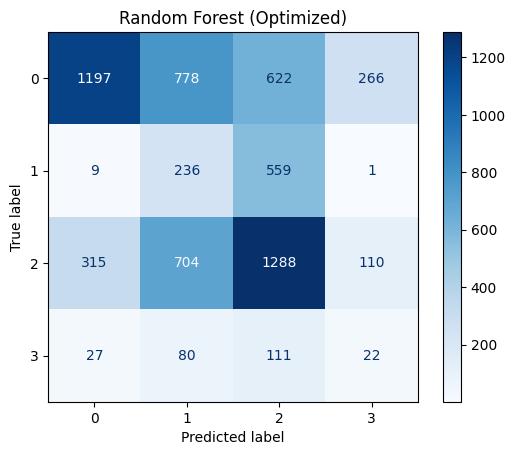

In [9]:
from models import train_RF
modelRF = train_RF(features_all, features_all_test, train_labels, train_labels_test)


📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean_fft             0.257083
y_mean_fft             0.192732
z_mean_fft             0.128643
x_min_fft              0.028471
y_min_fft              0.032000
z_min_fft              0.028000
x_maxmin_diff_fft      0.719007
y_maxmin_diff_fft      0.503300
z_maxmin_diff_fft      0.335962
x_median_fft           0.210000
y_median_fft           0.128625
z_median_fft           0.078724
x_IQR_fft              0.231368
y_IQR_fft              0.026729
z_IQR_fft              0.018355
x_above_mean_fft       2.000000
y_above_mean_fft       1.000000
z_above_mean_fft       1.000000
x_peak_count_fft       1.000000
y_peak_count_fft       1.000000
z_peak_count_fft       1.000000
x_kurtosis_fft        -0.348245
y_kurtosis_fft         0.031321
z_kurtosis_fft         0.091378
x_energy_fft           0.135048
y_energy_fft           0.068062
z_energy_fft           0.030900
avg_result_accl_fft    0.364348
sma_fft             

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.48423184819534953. Increase the number of iterations.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.47844816778088156. Increase the number of iterations.
  warnings.warn(



              precision    recall  f1-score   support

           1       0.55      0.69      0.61      2863
           2       0.14      0.13      0.14       805
           3       0.48      0.36      0.41      2417
           4       0.07      0.05      0.05       240

    accuracy                           0.47      6325
   macro avg       0.31      0.31      0.30      6325
weighted avg       0.45      0.47      0.45      6325



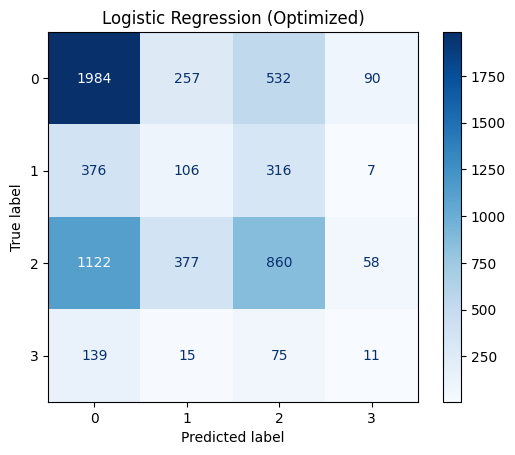

In [10]:
from models import train_LR
modelLR, scalerLr = train_LR(features_all, features_all_test, train_labels, train_labels_test)

💡 Training SVM (optimized)...
🎯 Test Accuracy: 0.4919
              precision    recall  f1-score   support

           1       0.60      0.76      0.67      2863
           2       0.15      0.16      0.15       805
           3       0.45      0.34      0.39      2417
           4       0.00      0.00      0.00       240

    accuracy                           0.49      6325
   macro avg       0.30      0.31      0.30      6325
weighted avg       0.46      0.49      0.47      6325



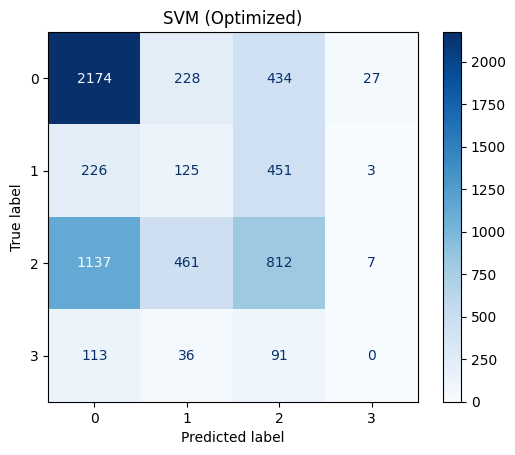

In [11]:
from models import train_SVM
modelSVM, scalerSVM = train_SVM(features_all, features_all_test, train_labels, train_labels_test)

🔥 Training Gradient Boosting (optimized)...
🎯 Test Accuracy: 0.4495
              precision    recall  f1-score   support

           1       0.71      0.48      0.57      2863
           2       0.19      0.41      0.26       805
           3       0.49      0.45      0.47      2417
           4       0.13      0.22      0.16       240

    accuracy                           0.45      6325
   macro avg       0.38      0.39      0.37      6325
weighted avg       0.54      0.45      0.48      6325



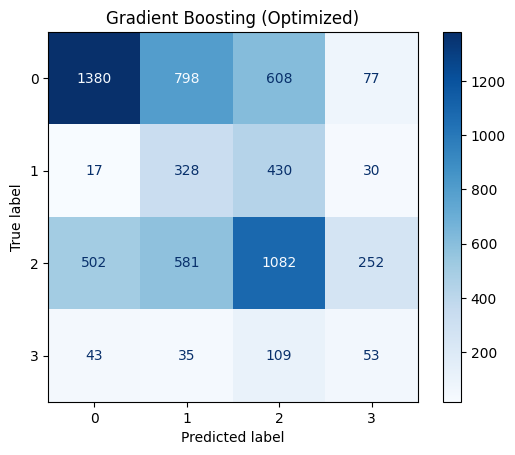

In [12]:
from models import train_GB
modelGB, scalerGB = train_GB(features_all, features_all_test, train_labels, train_labels_test)


In [13]:
from optimation import get_model_size_kb

get_model_size_kb(modelRF, None, "RandomForest")
get_model_size_kb(modelLR, scalerLr, "LogisticRegression")
get_model_size_kb(modelSVM, scalerSVM, "SVM")
get_model_size_kb(modelGB, None, "GradientBoosting")

📦 RandomForest: Model = 2183.68 KB | Scaler = 0.00 KB | Total = 2183.68 KB
🌲  → Tổng số nút trong mô hình cây: 23182
----------------------------------------------------------------------
📦 LogisticRegression: Model = 1.80 KB | Scaler = 2.11 KB | Total = 3.91 KB
🔢  → Số tham số huấn luyện: 120
----------------------------------------------------------------------
📦 SVM: Model = 4031.86 KB | Scaler = 2.11 KB | Total = 4033.97 KB
🔢  → Số tham số huấn luyện: 180
----------------------------------------------------------------------
📦 GradientBoosting: Model = 140.75 KB | Scaler = 0.00 KB | Total = 140.75 KB
🌲  → Tổng số nút trong mô hình cây: 1238
----------------------------------------------------------------------


140.7470703125